# **Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset.**

## Latar Belakang:
- Studi McKinsey mendefinisikan e-commerce sebagai **proses jual beli barang fisik secara online** yang dibagi kembali menjadi dua kategori, yaitu:
    - E-tailing, yaitu jual beli formal melalui platform online yang **didesain untuk memfasilitasi transaksi** seperti Bukalapak dan Tokopedia.
    - Social commerce, yaitu **pemasaran barang melalui media sosial** seperti Facebook atau Instagram dengan pembayaran dan pengiriman dilaksanakan melalui platform lain.
- E-commerce juga merupakan industri yang terbukti tahan dalam situasi pandemi belakangan ini.
- Salah satu faktor utama pendukung keberhasilan bisnis e-commerce adalah performa pengiriman barang (Delivery Performance).
- Delivery Performance dapat dimaknai dengan:
    - Ketepatan pengiriman terhadap estimasi waktu  yang diberikan oleh perusahaan e-commerce.
    - Seberapa cepat waktu pengiriman terhadap jarak yang di tempuh antara penjual dan pembeli.
- Berdasarkan data diatas maka penulis ingin melakukan penelitian mengenai **“Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset”**.

## Bisnis Problem.
- Berdasarkan Latar Belakang yang telah dijelaskan, penulis memiliki beberapa bisnis problem mengenai **Rating Restaurant**, yaitu:
    - Faktor apa yang mempengaruhi waktu pengiriman?
    - Faktor apa yang mempengaruhi kecepatan pengiriman?
    - Seberapa tepat delivery performance dari Olist terhadap waktu estimasi pengiriman?
    - Adakah hubungan antara delivery performance terhadap kepuasan pelanggan?
    - Seberapa tepat ML yang dibuat penulis untuk menentukan waktu pengiriman (Delivery Time)?
    
## Dataset
- Dataset yang digunakan merupakan public dataset yang dikeluarkan oleh Olist dari tahun 2016 – 2018.
- Olist merupakan perusahaan asal Brazil yang bergerak di bidang e-commerce melalui marketplace.
- Olist memiliki 9000 lebih tenant dan lebih dari 2 juta pelanggan di seluruh Brazil.
- Sumber dataset yang di gunakan dari Kaggle dengan link: https://www.kaggle.com/olistbr/brazilian-ecommerce
- Dari proses *data cleaning* dan *data preprocessing* yang di lakukan sebelumnya, maka di buat satu dataset yang akan digunakan untuk melakukan **Delivery Performance Analysis and Delivery Time Prediction Based on Olist Dataset** dengan nama file ``brazilian_ecommerce_after_cleaning.csv``, dan dalam dataset tersebut juga dipilih **feature** yang akan digunakan baik untuk proses **EDA**, maupun **Model Building untu Machine Learning**, berikut adalah penjelasan singkat mengenai kolom yang akan digunakan:
    - **Data Cleaning yang diambil dari dataset Olist**:
        - customer_id: *unique id* dari tiap *customer*.
        - customer_zip_code: kodepos dari *costumer*.
        - customer_city: kota asal dari *costumer*.
        - customer_state: asal negara bagian dari *costumer*.
        - customer_lat: koordinat latitude dari *costumer*.
        - customer_lng: koordinat longitude dari *costumer*.
        - seller_id: *unique id* dari tiap *seller*.
        - seller_zip_code: kodepos dari *seller*.
        - seller_city: kota asal dari *seller*.
        - seller_state: asal negara bagian dari *seller*.
        - seller_lat: koordinat latitude dari *seller*.
        - seller_lng: koordinat longitude dari *seller*
        - order_id: unique id* dari tiap *order*
        - order_status: status pengiriman.
        - review_score: *review score* yang diberikan *customer* setelah barang sampai.
        - quantity: jumlah barang yang dibeli.
        - order_purchase_timestamp: tanggal pembelian barang.
        - order_approved_at: tanggal order di approve.
        - shipping_limit_date: batas waktu penyerahan barang dari *seller* ke pihak ekspedisi.
        - order_delivered_carrier_date: tanggal *actual* ketika barang diserahkan dari *seller* ke pihak ekspedisi.
        - order_estimated_delivery_date: tanggal estimasi barang sampai ke *customer* yang dikeluarkan oleh pihak Olist.
        - actual_delivered_date: tanggal *actual* barang sampai ke *costumer*.
        - product_id: *unique id* dari tiap *product*.
        - product_category_name_english: nama *product category name* dalam bahasa inggris.
        - price: harga barang per *quantity*.
        - product_weight_g: berat tiap barang dalam gram per *quantity*.
        - product_length_cm: panjang dimensi barang.
        - product_height_cm: tinggi dimensi barang.
        - product_width_cm: lebar dimensi barang.
        - freight_value: harga jasa pengiriman barang per *quantity*.
        - 
        
    - **Feature yang dibuat untuk menunjukan analisa dari hasil Data Preprocessing**:
        - distance (Km): jarak antara *seller* dan *costumer*.
        - total_price: *price* x *quantity*.
        - volume_cm3: *product_length_cm* x *product_height_cm* x *product_width_cm*.
        - total_volume_cm3: *volume_cm3* x *quantity*.
        - total_freight_value: *freight_value* x *quantity*.
        - total_payment: *total_price* + *total_freight_value*.
        - seller_delivery_performance (days):performa *seller* dalam mengirim barang ke pihak ekspedisi, apakah melewati batas yang ditentukan atau tidak (shipping_limit_date - order_delivered_carrier_date).
        - delivery_performance (days) : performa perngiriman dalam mengirim barang hingga sampai ke pihak *customer*, apakah melewati batas yang ditentukan atau tidak (order_estimated_delivery_date - actual_delivered_date).
        - shipping_time_(days): lama waktu yang dibutuhkan oleh pihak ekspedisi untuk mengirim barang hingga sampai ke pihak *customer* (actual_delivered_date - order_delivered_carrier_date).
        - delivery_time (days): lama waktu pengiriman barang dari order tersebut diterima dan di bayar (*approved*). (actual_delivered_date - order_approved_at)
        - delivery_time/distance: kecepatan pengiriman berdasarkan lama waktu pengiriman/jarak antara *seller* dan customer (delivery_time (days)/distance (Km)).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('ggplot')
import matplotlib as mpl


def find_outlier(x):
    q1 = x.describe()['25%']
    q3 = x.describe()['75%']
    iqr = abs(q1-q3)
    bttm_threshold = q1 - (iqr*1.5)
    top_threshold = q3 + (iqr*1.5)
    outlier = [i for i in x if i < bttm_threshold or i > top_threshold]
    outlier_array = np.array(outlier)
    return bttm_threshold, top_threshold, outlier_array

# **Distribusi Data**

In [2]:
maindata = pd.read_csv('brazilian_ecommerce_after_cleaning.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
display(maindata.head(5), maindata.shape)

,customer_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code,seller_city,seller_state,seller_lat,seller_lng,distance (Km),order_id,order_status,review_score,quantity,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_estimated_delivery_date,actual_delivered_date,product_id,product_category_name_english,price,total_price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,total_volume_cm3,freight_value,total_freight_value,total_payment,seller_delivery_performance (days),delivery_performance (days),shipping_time_(days),delivery_time (days),delivery_time/distance
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486111,-46.366721,348.880143,00e7ee1b050b8499577073aeb2a297a1,delivered,4,1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-23 10:47:57,2017-06-05 00:00:00,2017-05-25 10:35:35,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,124.99,124.99,8683.0,54.0,64.0,31.0,107136.0,107136.0,21.88,21.88,146.87,-1,10,1,8,0.022931
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,-20.498489,-47.396929,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,-23.691013,-46.703810,362.214896,98991dc034323e310fdd97b8af6064b0,delivered,5,2,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-10 12:29:44,2018-05-09 10:13:00,2018-05-22 00:00:00,2018-05-14 17:58:16,928e52a9ad53a294fdcc91bcf59d1751,housewares,130.00,260.00,1600.0,20.0,60.0,20.0,24000.0,48000.0,15.00,30.00,290.00,1,7,5,6,0.016565
2,5dca924cc99eea2dc5ba40d11ec5dd0f,14409,franca,SP,-20.498489,-47.396929,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,-21.757321,-48.829744,204.214075,95261f608a64bbbe760a212b4d48a4ee,delivered,5,1,2018-06-15 20:07:13,2018-06-15 20:41:11,2018-06-19 20:30:41,2018-06-18 15:52:00,2018-07-05 00:00:00,2018-06-21 12:18:32,99a4788cb24856965c36a24e339b6058,bed_bath_table,79.90,79.90,1383.0,50.0,10.0,40.0,20000.0,20000.0,14.87,14.87,94.77,1,13,2,5,0.024484
3,48a9965057e1c75ed3a4d511714be18b,14409,franca,SP,-20.498489,-47.396929,4a3ca9315b744ce9f8e9374361493884,14940,ibitinga,SP,-21.757321,-48.829744,204.214075,dbabdffb9ca50a2b51c3501d849e311b,delivered,5,1,2017-06-11 17:20:01,2017-06-11 17:45:15,2017-06-15 17:45:15,2017-06-13 09:18:58,2017-07-03 00:00:00,2017-06-19 14:42:00,fcad6e5643f855de4b616a24e6dd25e4,bed_bath_table,286.40,286.40,15150.0,63.0,30.0,43.0,81270.0,81270.0,37.51,37.51,323.91,2,13,6,7,0.034278
4,3ecddf921de5c14ec1f8bad33216e058,14409,franca,SP,-20.498489,-47.396929,da8622b14eb17ae2831f4ac5b9dab84a,13405,piracicaba,SP,-22.708702,-47.664701,247.396090,dc7b936d5f26f7506fc2242764d07424,delivered,5,1,2017-07-02 00:19:41,2017-07-02 00:30:12,2017-07-06 00:30:12,2017-07-04 08:50:59,2017-07-21 00:00:00,2017-07-07 18:21:52,9e572ff4654f7064419d97a891a8b0fc,bed_bath_table,139.90,139.90,1900.0,47.0,7.0,35.0,11515.0,11515.0,14.00,14.00,153.90,1,13,3,5,0.020211


(97893, 41)

In [5]:
maindata.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code,97893.0,35085.223377,29816.415399,1003.000000,11320.000000,24358.000000,58430.000000,9.998000e+04
customer_lat,97893.0,-21.203495,5.592322,-33.689948,-23.589488,-22.924015,-20.140360,4.218400e+01
customer_lng,97893.0,-46.191597,4.049498,-72.668881,-48.112804,-46.632826,-43.629511,-8.723762e+00
seller_zip_code,97893.0,24740.148192,27777.080227,1001.000000,6440.000000,13720.000000,29156.000000,9.973000e+04
seller_lat,97893.0,-22.794175,2.747903,-32.079231,-23.612734,-23.414433,-21.757321,-2.501242e+00
seller_lng,97893.0,-47.246040,2.351616,-63.893565,-48.829744,-46.755753,-46.522287,-3.485562e+01
distance (Km),97893.0,601.216298,592.279050,0.025000,190.511882,435.276707,798.895257,8.680636e+03
review_score,97893.0,4.111387,1.321463,1.000000,4.000000,5.000000,5.000000,5.000000e+00
quantity,97893.0,1.151574,0.565464,1.000000,1.000000,1.000000,1.000000,2.100000e+01
price,97893.0,123.956353,187.806822,0.850000,40.000000,78.000000,139.000000,6.735000e+03


Melihat distribusi data dari semua kolom yang memiliki numerical value.

In [6]:
maindata.describe(include='object').T

,count,unique,top,freq
customer_id,97893,94078,0d861a5e4dd6a9079d89e1330848f0ab,8
customer_city,97893,4019,sao paulo,15332
customer_state,97893,27,SP,41270
seller_id,97893,2904,6560211a19b47992c3666cc44a7e94c0,1931
seller_city,97893,588,sao paulo,24171
seller_state,97893,22,SP,69487
order_id,97893,94078,ca3625898fbd48669d50701aba51cd5f,8
order_status,97893,1,delivered,97893
order_purchase_timestamp,97893,93586,2018-08-12 02:11:20,8
order_approved_at,97893,86274,2018-02-27 04:31:10,9


Melihat distribusi data berdasarkan kolom yang memiliki object value.

# **Faktor Yang Mempengaruhi Waktu Pengiriman**

## Distribusi Data Waktu Pengiriman ``[delivery_time (days)]``

In [7]:
maindata['delivery_time (days)'].describe()

count    97893.00000
mean        11.60038
std          9.49917
min          1.00000
25%          6.00000
50%          9.00000
75%         15.00000
max        208.00000
Name: delivery_time (days), dtype: float64

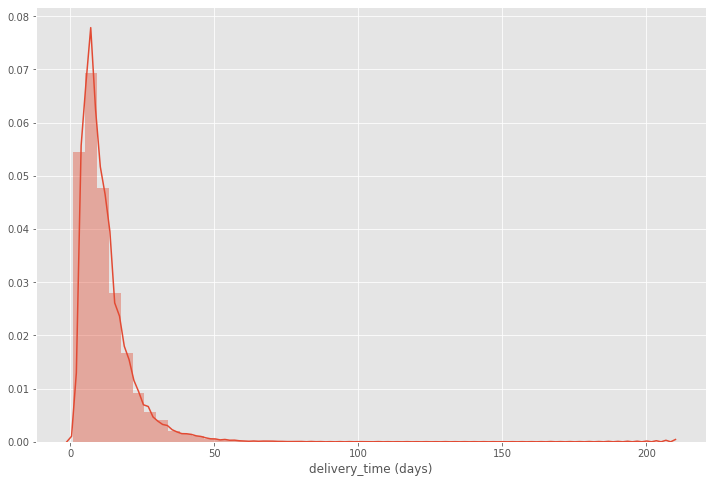

In [8]:
plt.figure(figsize= (12, 8))
sns.distplot(maindata['delivery_time (days)']);

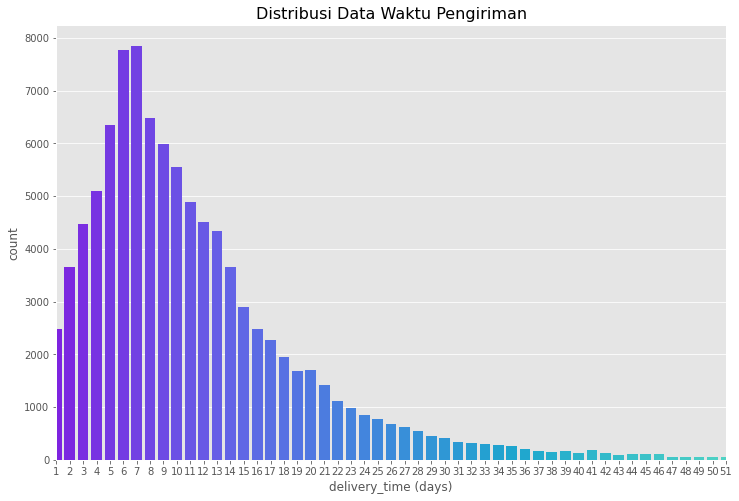

In [9]:
plt.figure(figsize= (12, 8))
sns.countplot(x='delivery_time (days)', data=maindata, palette= 'rainbow')
plt.xlim([0,50])
plt.title('Distribusi Data Waktu Pengiriman', size=16);
plt.savefig('Distribusi Data Waktu Pengiriman 2.jpg', pil_kwargs={'quality': 95, 'optimize':True})

Dari data lama waktu pengiriman ``[delivery_time (days)]`` dapat dilihat sebaran datanya skewness positif (cenderung kekiri), dan dapat diambil kesimpulan berdasarkan visualisasi tersebut:
- Data tidak terdistribusi normal.
- Lama waktu pengiriman paling banyak adalah 7 hari, diikuti oleh 6 hari, dengan jumlah pengiriman lebih dari 7000 kali.
- Memiliki rata-rata lama waktu pengiriman 11,5 hari, dan mean 9 hari.

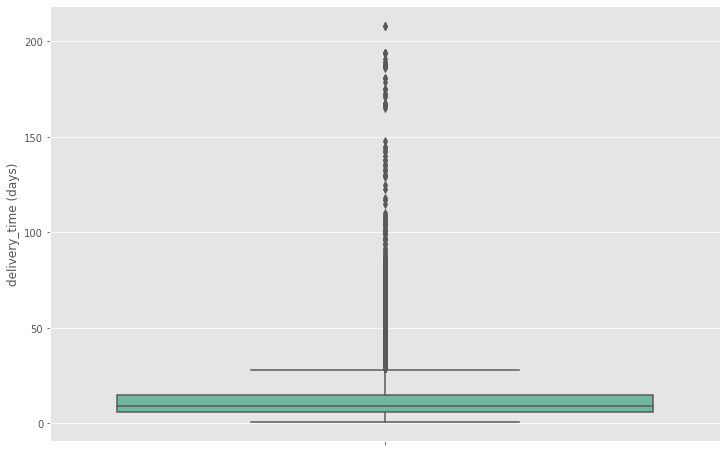

In [10]:
plt.figure(figsize= (12, 8))
sns.boxplot(maindata['delivery_time (days)'],  orient= 'v', palette= 'Set2');

In [11]:
find_outlier(maindata['delivery_time (days)'])

(-7.5, 28.5, array([40, 37, 46, ..., 38, 35, 32]))

In [12]:
len(find_outlier(maindata['delivery_time (days)'])[2])

4762

Berdasarkan pengecekan outlier pada data diatas dapat dilihat:
- bottom threshold bernilai: -7.5
- top threshold bernilai: 28.5
- jumlah outlier: 4762
- seluruh outlier berada pada area top threhold dengan nilai diatas 28.5

## Korelasi Waktu Pengiriman Terhadap Numerical Data

In [13]:
len(maindata.describe().columns)

25

In [14]:
find_corr = maindata[maindata.describe().columns]
corr_matrix = find_corr.corr()
corr_matrix['delivery_time (days)'].sort_values(ascending=False)

delivery_time (days)                  1.000000
shipping_time_(days)                  0.928258
distance (Km)                         0.389648
customer_zip_code                     0.267333
customer_lat                          0.256097
freight_value                         0.210303
total_freight_value                   0.154780
customer_lng                          0.112741
product_weight_g                      0.080459
volume_cm3                            0.071801
total_payment                         0.066887
product_length_cm                     0.064805
product_height_cm                     0.060752
price                                 0.059560
total_volume_cm3                      0.059445
total_price                           0.053243
seller_lat                            0.052165
seller_zip_code                       0.049358
product_width_cm                      0.041841
delivery_time/distance               -0.004477
quantity                             -0.022533
seller_lng   

Berdasarkan data diatas maka beberapa feature akan dipilih sesuai dengan domain knowledge dan type datanya yang mempengaruhi waktu pengiriman ``[delivery_time (days)]``, maka feature yang akan dibuang:
- customer_zip_code : karena sudah diwakili oleh jarak.
- customer_lat : karena sudah diwakili oleh jarak.
- customer_lng : karena sudah diwakili oleh jarak.
- seller_zip_code : karena sudah diwakili oleh jarak.
- seller_lat : karena sudah diwakili oleh jarak.
- seller_lng : karena sudah diwakili oleh jarak.
- delivery_time/distance : karena faktor tersebut merupakan dependent dari ``[delivery_time (days)]``.
- review_score : karena review score akan dimasukan setelah pengiriman dilakukan.
- delivery_performance (days): karena faktor tersebut merupakan dependent dari ``[delivery_time (days)]``.

In [15]:
maindata[['distance (Km)', 'quantity', 'price', 'total_price',
          'product_weight_g', 'product_length_cm', 'product_height_cm',
          'product_width_cm', 'volume_cm3', 'total_volume_cm3',
          'freight_value', 'total_freight_value', 'total_payment',
          'seller_delivery_performance (days)', 'shipping_time_(days)',
          'delivery_time (days)']]

,distance (Km),quantity,price,total_price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,total_volume_cm3,freight_value,total_freight_value,total_payment,seller_delivery_performance (days),shipping_time_(days),delivery_time (days)
0,348.880143,1,124.99,124.99,8683.0,54.0,64.0,31.0,107136.0,107136.0,21.88,21.88,146.87,-1,1,8
1,362.214896,2,130.00,260.00,1600.0,20.0,60.0,20.0,24000.0,48000.0,15.00,30.00,290.00,1,5,6
2,204.214075,1,79.90,79.90,1383.0,50.0,10.0,40.0,20000.0,20000.0,14.87,14.87,94.77,1,2,5
3,204.214075,1,286.40,286.40,15150.0,63.0,30.0,43.0,81270.0,81270.0,37.51,37.51,323.91,2,6,7
4,247.396090,1,139.90,139.90,1900.0,47.0,7.0,35.0,11515.0,11515.0,14.00,14.00,153.90,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97888,454.737271,1,412.00,412.00,3000.0,30.0,30.0,20.0,18000.0,18000.0,20.50,20.50,432.50,5,4,5
97889,1640.005410,1,410.00,410.00,2650.0,30.0,30.0,20.0,18000.0,18000.0,35.32,35.32,445.32,5,19,20
97890,1250.339041,1,30.00,30.00,400.0,26.0,2.0,19.0,988.0,988.0,17.78,17.78,47.78,1,6,11
97891,553.302197,1,84.90,84.90,150.0,16.0,5.0,12.0,960.0,960.0,18.69,18.69,103.59,1,4,6


In [16]:
find_corr = maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                      'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                      'freight_value', 'total_freight_value', 'total_payment',
                      'seller_delivery_performance (days)', 'shipping_time_(days)',
                      'delivery_time (days)']]
corr_matrix = find_corr.corr()
corr_matrix['delivery_time (days)'].sort_values(ascending=False)

delivery_time (days)                  1.000000
shipping_time_(days)                  0.928258
distance (Km)                         0.389648
freight_value                         0.210303
total_freight_value                   0.154780
product_weight_g                      0.080459
volume_cm3                            0.071801
total_payment                         0.066887
product_length_cm                     0.064805
product_height_cm                     0.060752
price                                 0.059560
total_volume_cm3                      0.059445
total_price                           0.053243
product_width_cm                      0.041841
quantity                             -0.022533
seller_delivery_performance (days)   -0.164441
Name: delivery_time (days), dtype: float64

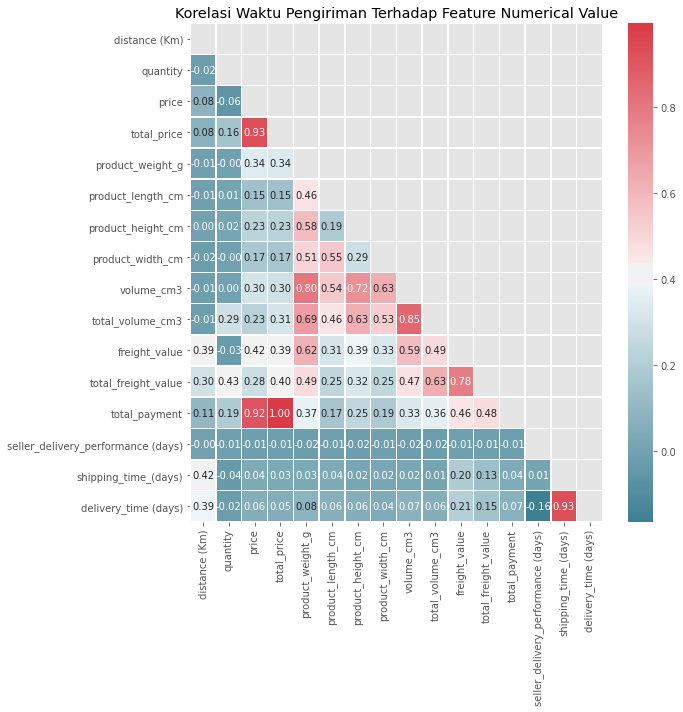

In [17]:
corr = maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                      'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                      'freight_value', 'total_freight_value', 'total_payment',
                      'seller_delivery_performance (days)', 'shipping_time_(days)',
                      'delivery_time (days)']].corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Korelasi Waktu Pengiriman Terhadap Feature Numerical Value')
plt.tight_layout()
plt.savefig('Korelasi Waktu Pengiriman Terhadap Feature Numerical Value.jpg', pil_kwargs={'quality': 95, 'optimize':True,
                                                                                         'bbox_inches' : 'tight'})
plt.show()

Dari visualisasi diatas dapat disimpulkan bahwa faktor yang memperngaruhi waktu pengiriman ``[delivery_time (days)]``, yang terkuat berdasarkan feature yang sudah dipilih melaui *domain knowledge*, adalah:
- shipping_time_(days)               :  0.928258 (sangat kuat)
- distance (Km)                      :  0.389648 (rendah)
- freight_value                      :  0.210303 (rendah)
- total_freight_value                :  0.154780 (sangat rendah)
- seller_delivery_performance (days) : -0.164441 (sangat rendah)

Dapat disimpulkan bahwa faktor yang sangat berpengaruh dalam lama pengiriman adalah lama pengiriman dari pihak ekspedisi.

reff: https://www.statistikian.com/2012/07/pearson-dan-asumsi-klasik.html

## Distribusi Numerical Data dari Feature yang Dipilih

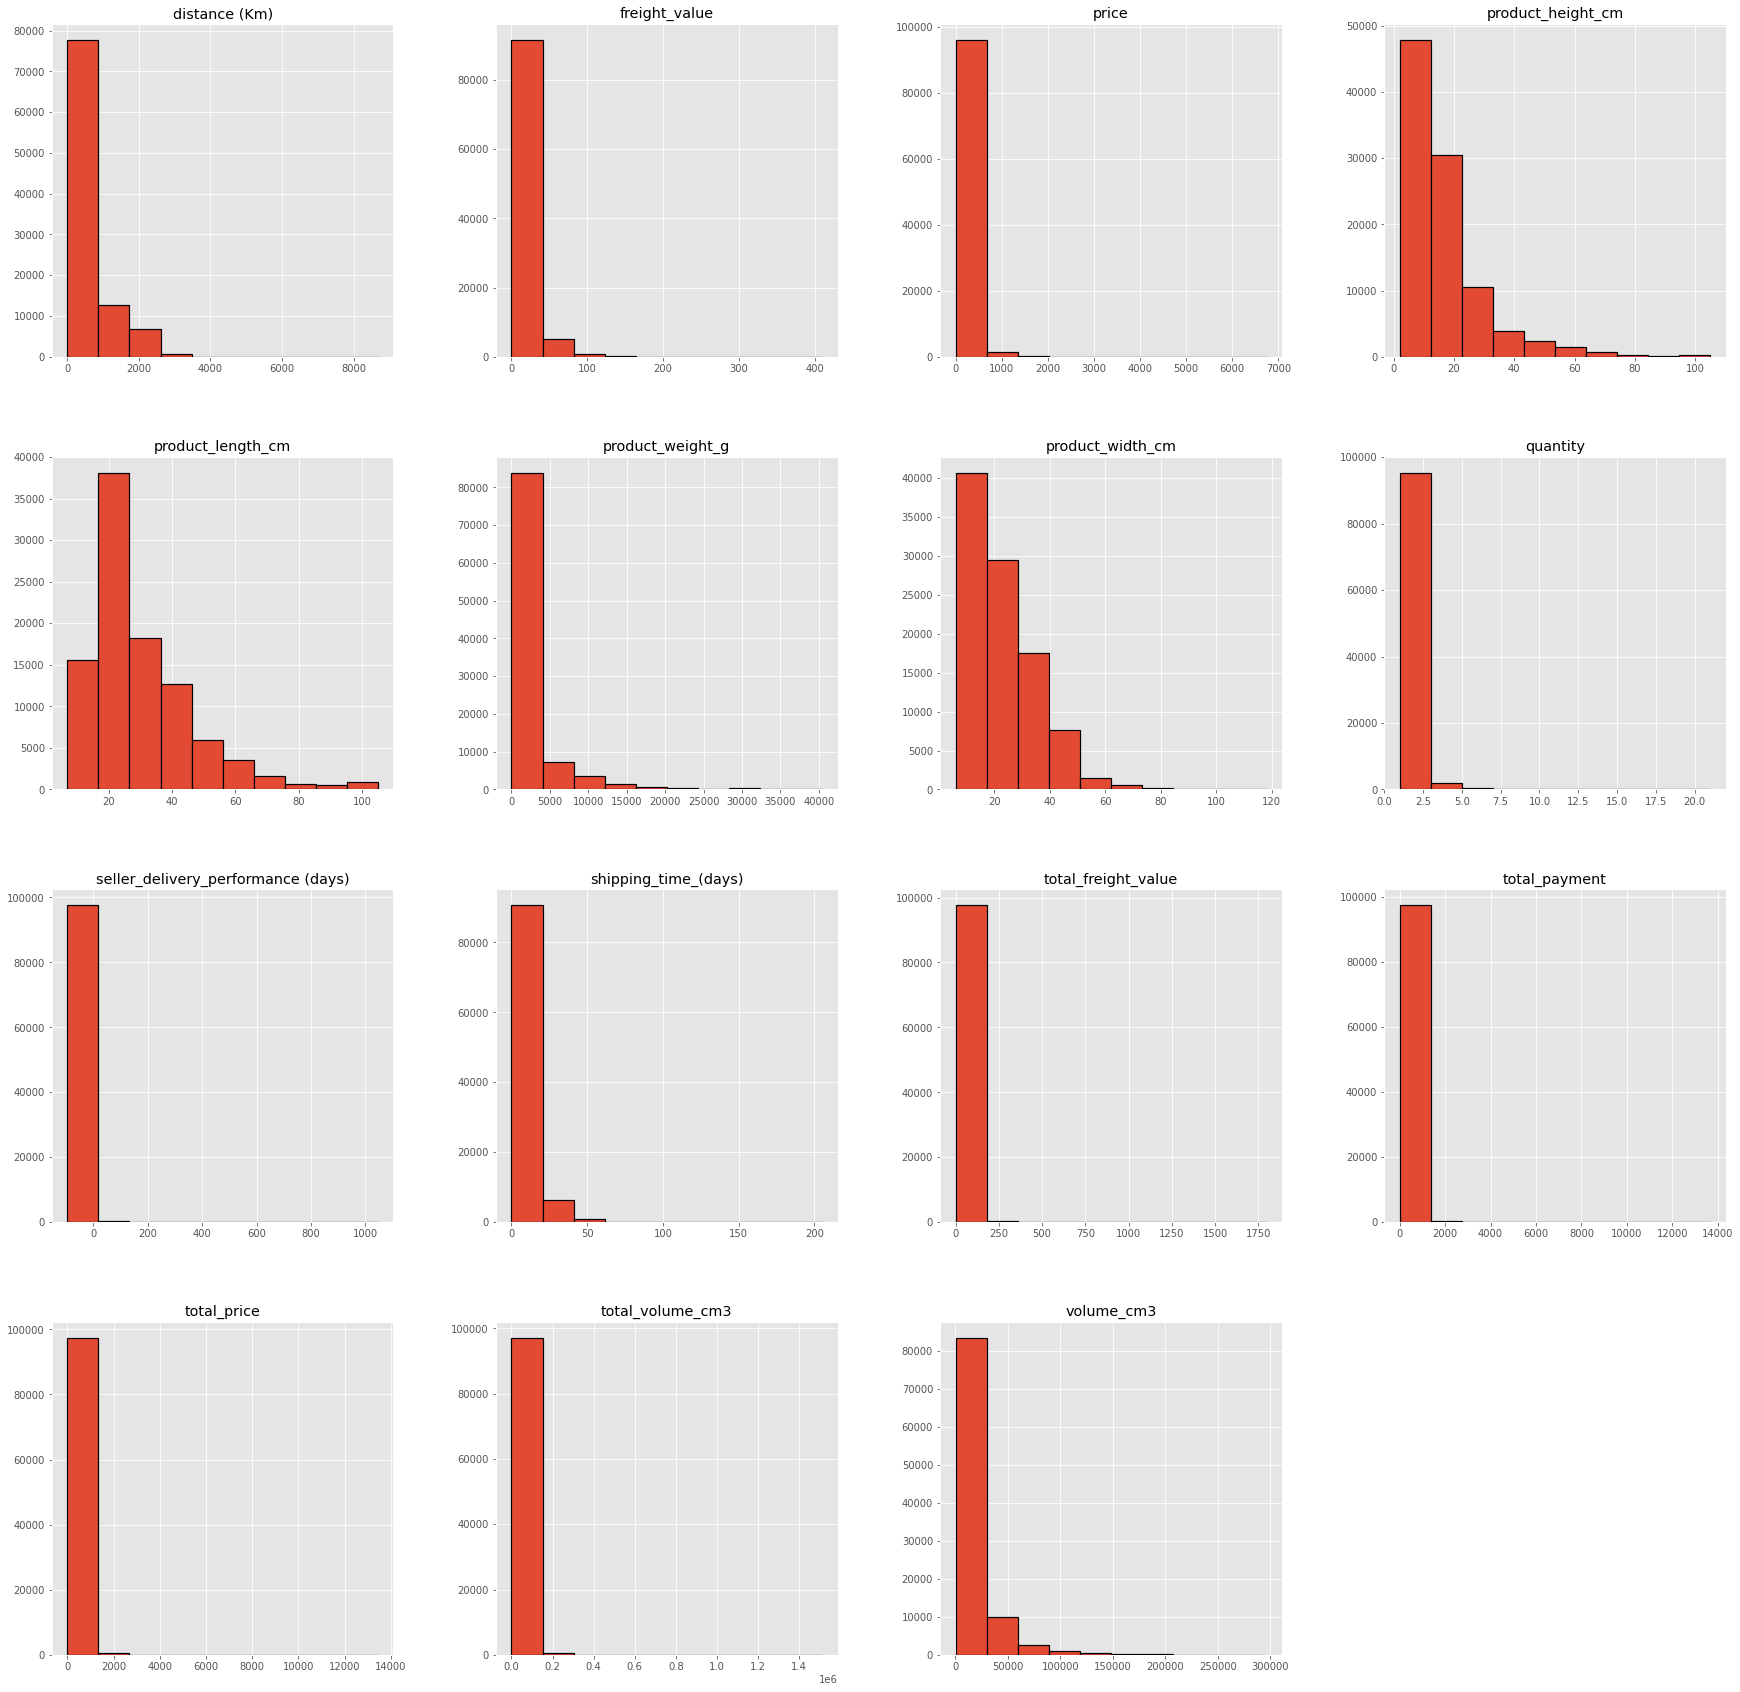

In [17]:
# Visualizing the distribution for every "feature"
maindata[['distance (Km)', 'quantity', 'price', 'total_price',
          'product_weight_g', 'product_length_cm', 'product_height_cm',
          'product_width_cm', 'volume_cm3', 'total_volume_cm3',
          'freight_value', 'total_freight_value', 'total_payment',
          'seller_delivery_performance (days)',
          'shipping_time_(days)']].hist(edgecolor="black", linewidth=1.2, figsize=(30, 30))
plt.show()

In [18]:
# NormalTest for every feature
feature = ['distance (Km)', 'quantity', 'price', 'total_price',
          'product_weight_g', 'product_length_cm', 'product_height_cm',
          'product_width_cm', 'volume_cm3', 'total_volume_cm3',
          'freight_value', 'total_freight_value', 'total_payment',
          'seller_delivery_performance (days)', 'shipping_time_(days)']
for i in feature:
    k2, p = stats.normaltest(maindata[i])
    alpha = 0.05
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f"{i} : The null hypothesis can be rejected")
    else:
        print(f"{i} : The null hypothesis cannot be rejected")

distance (Km) : The null hypothesis can be rejected
quantity : The null hypothesis can be rejected
price : The null hypothesis can be rejected
total_price : The null hypothesis can be rejected
product_weight_g : The null hypothesis can be rejected
product_length_cm : The null hypothesis can be rejected
product_height_cm : The null hypothesis can be rejected
product_width_cm : The null hypothesis can be rejected
volume_cm3 : The null hypothesis can be rejected
total_volume_cm3 : The null hypothesis can be rejected
freight_value : The null hypothesis can be rejected
total_freight_value : The null hypothesis can be rejected
total_payment : The null hypothesis can be rejected
seller_delivery_performance (days) : The null hypothesis can be rejected
shipping_time_(days) : The null hypothesis can be rejected


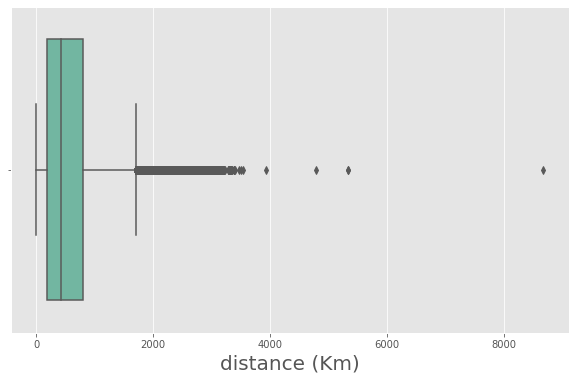

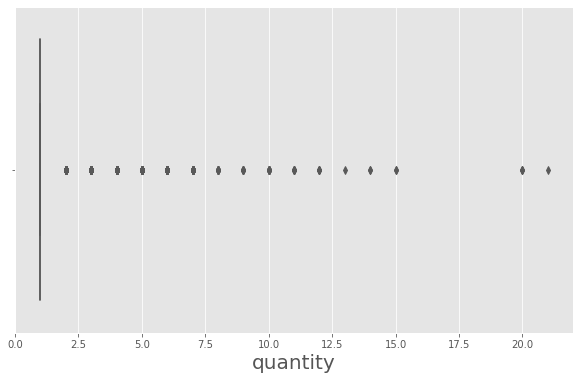

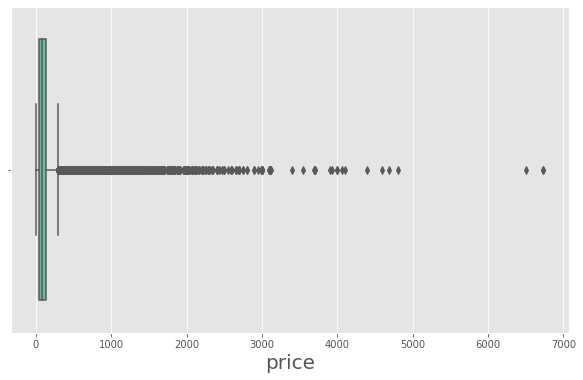

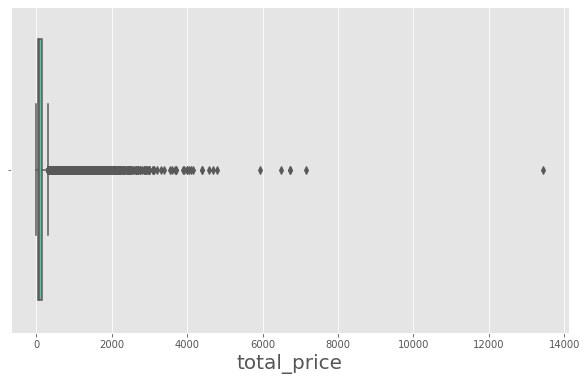

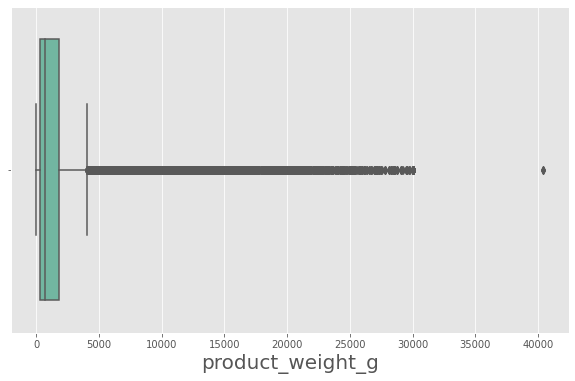

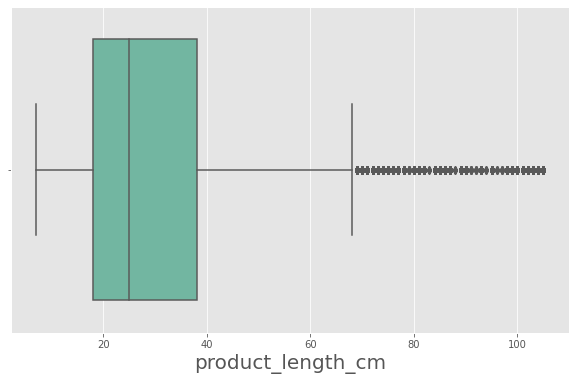

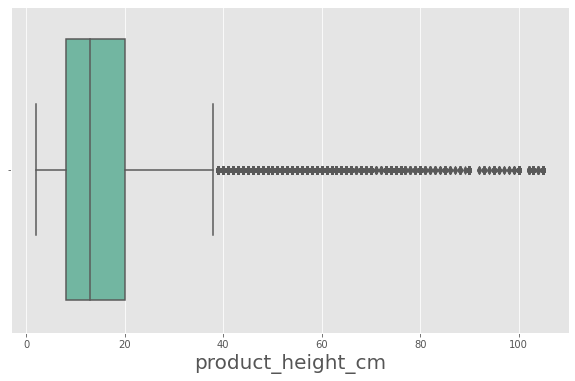

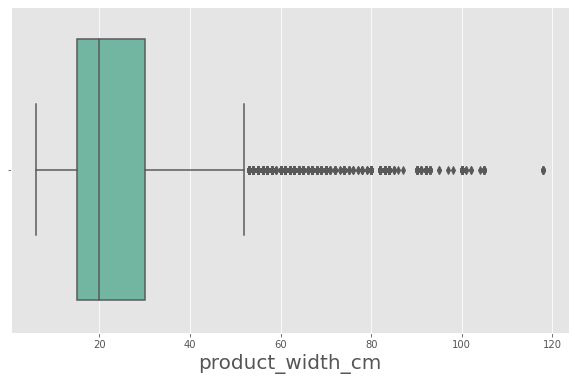

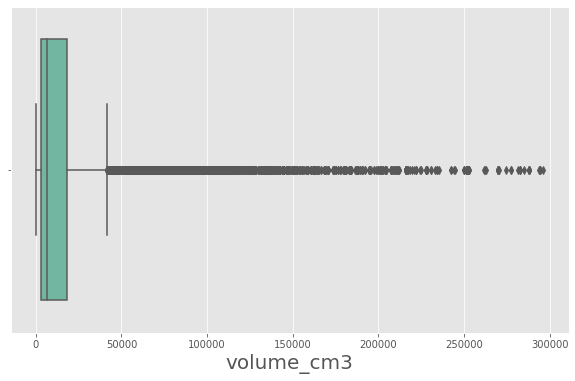

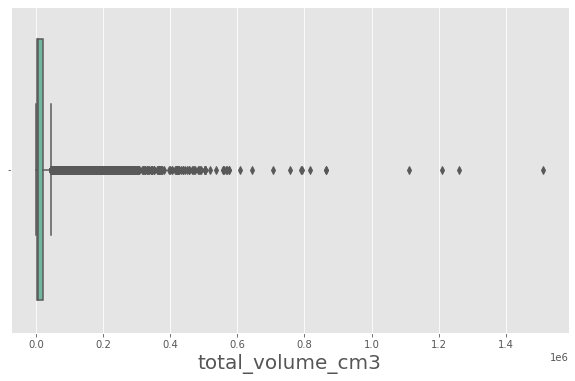

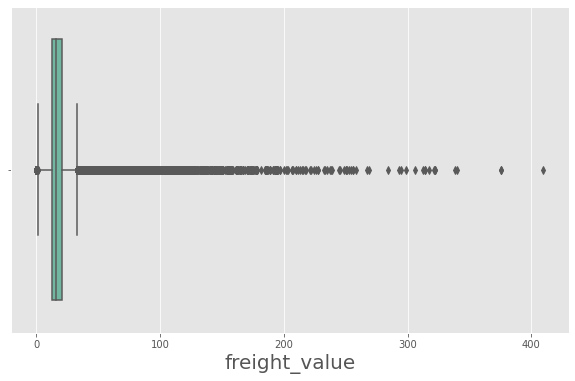

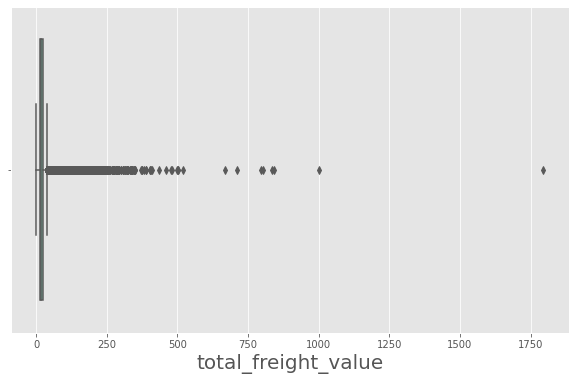

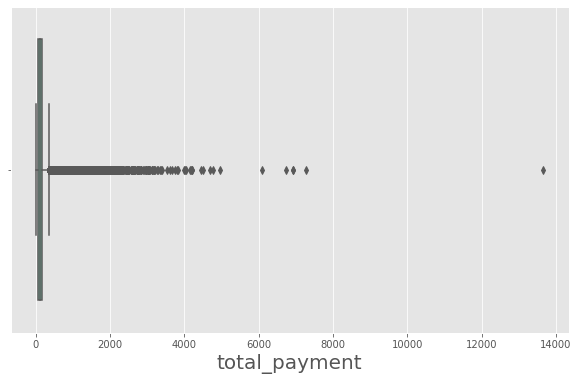

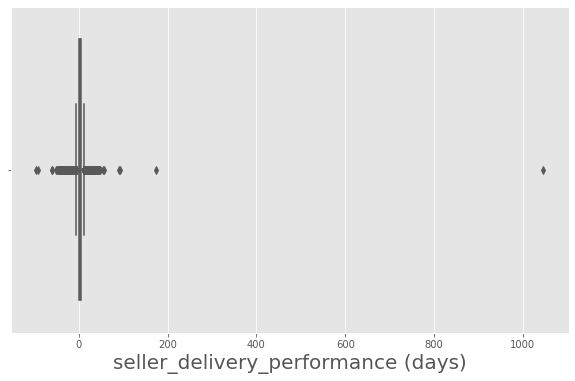

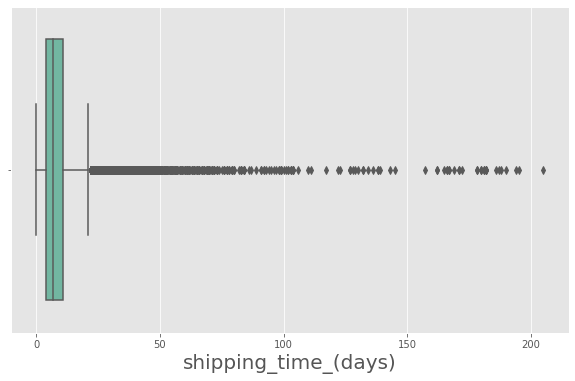

In [19]:
# Checking outlier with boxplot
for columns in maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                         'product_weight_g', 'product_length_cm', 'product_height_cm',
                         'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                         'freight_value', 'total_freight_value', 'total_payment',
                         'seller_delivery_performance (days)', 'shipping_time_(days)']]:
    plt.figure(figsize = (10,6))
    ax = sns.boxplot(x = columns, data = maindata, palette= 'Set2')
    
    plt.xlabel(columns, fontsize = 20)    
    plt.show()

In [49]:
# Jumlah outlier disetiap kolom continous
for i in maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                   'product_weight_g', 'product_length_cm', 'product_height_cm',
                   'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                   'freight_value', 'total_freight_value', 'total_payment',
                   'seller_delivery_performance (days)', 'shipping_time_(days)']].columns:
    print(f'kolom {i} memiliki jumlah outlier sebanyak {len(find_outlier(maindata[i])[2])}')

kolom distance (Km) memiliki jumlah outlier sebanyak 7567
kolom quantity memiliki jumlah outlier sebanyak 10231
kolom price memiliki jumlah outlier sebanyak 7345
kolom total_price memiliki jumlah outlier sebanyak 7737
kolom product_weight_g memiliki jumlah outlier sebanyak 13894
kolom product_length_cm memiliki jumlah outlier sebanyak 3134
kolom product_height_cm memiliki jumlah outlier sebanyak 6536
kolom product_width_cm memiliki jumlah outlier sebanyak 2226
kolom volume_cm3 memiliki jumlah outlier sebanyak 8644
kolom total_volume_cm3 memiliki jumlah outlier sebanyak 9115
kolom freight_value memiliki jumlah outlier sebanyak 10385
kolom total_freight_value memiliki jumlah outlier sebanyak 9988
kolom total_payment memiliki jumlah outlier sebanyak 7695
kolom seller_delivery_performance (days) memiliki jumlah outlier sebanyak 2946
kolom shipping_time_(days) memiliki jumlah outlier sebanyak 6228


Dari analisa data diatas dapat dilihat bahwa seluruh feature numerical yang dipilih terhadap lama waktu pengiriman ``[delivery_time (days)]``:
- Sebaran datanya seluruhnya skewness positif.
- Seluruh feature tidak terdistribusi normal.
- Seluruh feature memiliki outlier dengan jumlah beragam.

# **Faktor apa yang mempengaruhi kecepatan pengiriman**

## Numerical Data

In [21]:
len(maindata.describe().columns)

25

In [22]:
find_corr = maindata[maindata.describe().columns]
corr_matrix = find_corr.corr()
corr_matrix['delivery_time/distance'].sort_values(ascending=False)

delivery_time/distance                1.000000
total_volume_cm3                      0.004821
seller_zip_code                       0.003500
volume_cm3                            0.003435
product_height_cm                     0.002832
price                                 0.001899
total_price                           0.001555
product_weight_g                      0.000700
total_payment                         0.000431
seller_lng                            0.000005
product_width_cm                     -0.000017
quantity                             -0.000793
product_length_cm                    -0.002936
review_score                         -0.003918
delivery_time (days)                 -0.004477
seller_lat                           -0.004512
seller_delivery_performance (days)   -0.006626
customer_zip_code                    -0.007076
customer_lng                         -0.007834
total_freight_value                  -0.010131
shipping_time_(days)                 -0.011759
customer_lat 

Berdasarkan data diatas maka beberapa feature akan dipilih sesuai dengan domain knowledge dan type datanya yang mempengaruhi waktu pengiriman ``[delivery_time (days)]``, maka feature yang akan dibuang:
- customer_zip_code : karena sudah diwakili oleh jarak.
- customer_lat : karena sudah diwakili oleh jarak.
- customer_lng : karena sudah diwakili oleh jarak.
- seller_zip_code : karena sudah diwakili oleh jarak.
- seller_lat : karena sudah diwakili oleh jarak.
- seller_lng : karena sudah diwakili oleh jarak.
- review_score : karena review score akan dimasukan setelah pengiriman dilakukan.

In [56]:
find_corr = maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                      'product_weight_g', 'product_length_cm', 'product_height_cm',
                      'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                      'freight_value', 'total_freight_value', 'total_payment',
                      'seller_delivery_performance (days)', 'shipping_time_(days)',
                      'delivery_time (days)', 'delivery_performance (days)',
                      'delivery_time/distance']]
corr_matrix = find_corr.corr()
corr_matrix['delivery_time/distance'].sort_values(ascending=False)

delivery_time/distance                1.000000
total_volume_cm3                      0.004821
volume_cm3                            0.003435
product_height_cm                     0.002832
price                                 0.001899
total_price                           0.001555
product_weight_g                      0.000700
total_payment                         0.000431
product_width_cm                     -0.000017
quantity                             -0.000793
product_length_cm                    -0.002936
delivery_time (days)                 -0.004477
seller_delivery_performance (days)   -0.006626
total_freight_value                  -0.010131
shipping_time_(days)                 -0.011759
freight_value                        -0.013627
delivery_performance (days)          -0.015588
distance (Km)                        -0.030996
Name: delivery_time/distance, dtype: float64

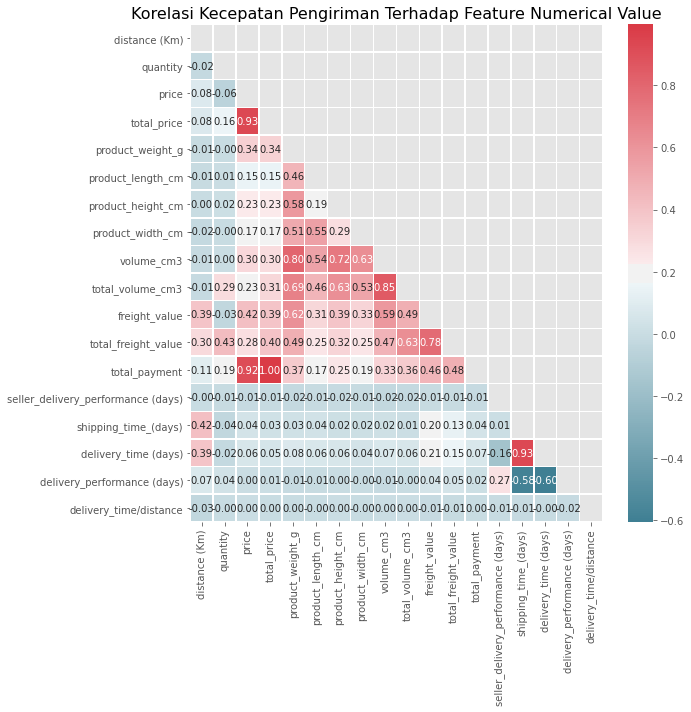

In [18]:
corr = maindata[['distance (Km)', 'quantity', 'price', 'total_price',
                 'product_weight_g', 'product_length_cm', 'product_height_cm',
                 'product_width_cm', 'volume_cm3', 'total_volume_cm3',
                 'freight_value', 'total_freight_value', 'total_payment',
                 'seller_delivery_performance (days)', 'shipping_time_(days)',
                 'delivery_time (days)', 'delivery_performance (days)',
                 'delivery_time/distance']].corr()
fig, ax = plt.subplots(figsize = (10,10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Korelasi Kecepatan Pengiriman Terhadap Feature Numerical Value', size=16)
plt.tight_layout()
plt.savefig('Korelasi Kecepatan Pengiriman Terhadap Feature Numerical Value.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
plt.show()

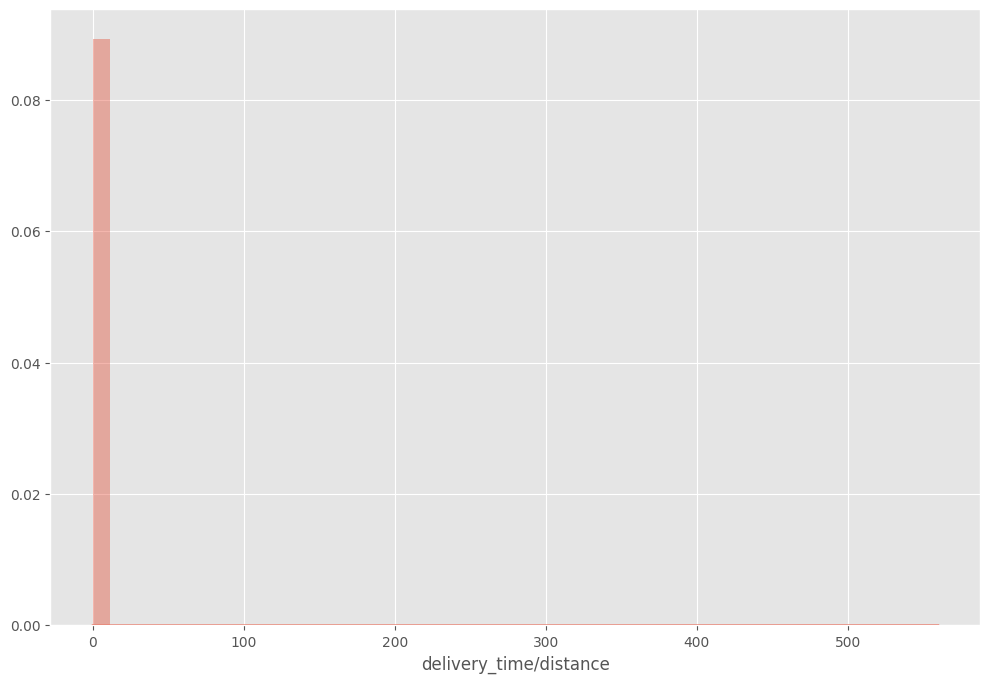

In [59]:
plt.figure(figsize= (12, 8))
sns.distplot(maindata['delivery_time/distance']);

<AxesSubplot:ylabel='delivery_time/distance'>

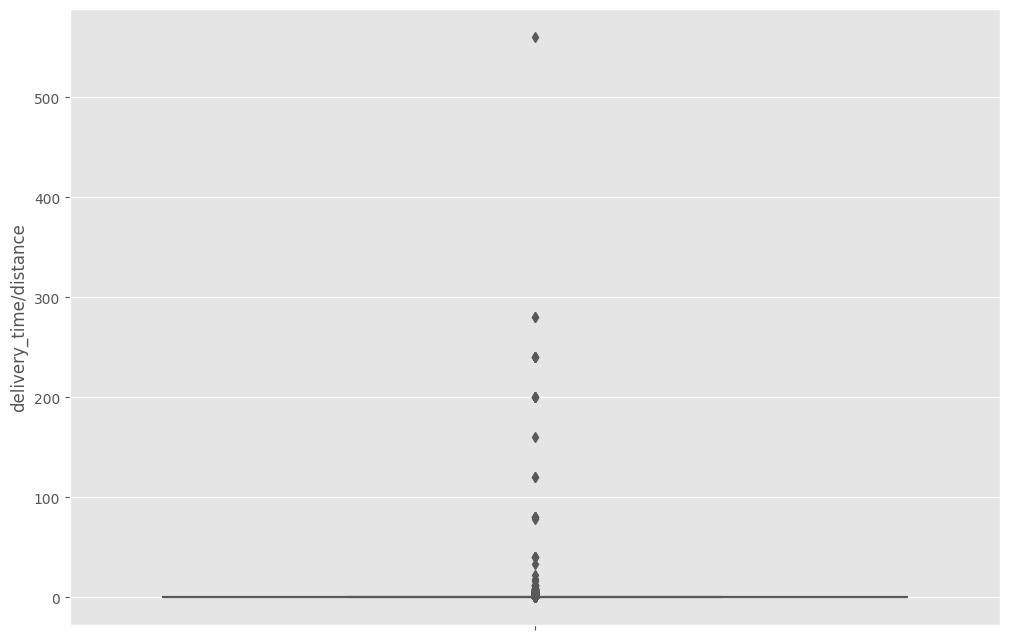

In [62]:
plt.figure(figsize= (12, 8))
sns.boxplot(maindata['delivery_time/distance'],  orient= 'v', palette= 'Set2')

In [63]:
find_outlier(maindata['delivery_time/distance'])

(-0.03906476336175744,
 0.0991703428222088,
 array([6.65986131, 7.49234397, 0.14161941, ..., 0.41260189, 0.29392316,
        0.22767112]))

In [64]:
len(find_outlier(maindata['delivery_time/distance'])[2])

12616

Dari data diatas dapat disimpulkan bahwa seluruh feature yang memiliki numerical value yang sudah dipilih memiliki korelasi yang sangat lemah terhadap kecepatan pengiriman ``[delivery_time/distance]``, dengan nilai korelasi tertinggi yaitu -0.030996 terhadap ``[distance (Km)]``. Ini dapat disimpulkan bahwa kecepatan pengiriman memiliki value yang seragam tidak dipengaruhi oleh faktor yang membentuk sekalipun seperti ``[delivery_time (days) ]`` dan ``[distance (Km)]``, nilai diatas top threshold yang merupakan outlier (dikarenakan keterbatasan data observasi) diasumsikan sebagai anomali keterlambatan pengiriman dari human error.

## Object Data

In [25]:
maindata.describe(include='object').T

,count,unique,top,freq
customer_id,97893,94078,0d861a5e4dd6a9079d89e1330848f0ab,8
customer_city,97893,4019,sao paulo,15332
customer_state,97893,27,SP,41270
seller_id,97893,2904,6560211a19b47992c3666cc44a7e94c0,1931
seller_city,97893,588,sao paulo,24171
seller_state,97893,22,SP,69487
order_id,97893,94078,ca3625898fbd48669d50701aba51cd5f,8
order_status,97893,1,delivered,97893
order_purchase_timestamp,97893,93586,2018-08-12 02:11:20,8
order_approved_at,97893,86274,2018-02-27 04:31:10,9


### Fastest Shipping by Product Category

In [26]:
fastest_shipping_by_product_category = maindata.groupby('product_category_name_english').agg({'quantity': 'sum',
                                                                                              'total_volume_cm3' : 'sum',
                                                                                              'delivery_time/distance':'mean'})

fastest_shipping_by_product_category = fastest_shipping_by_product_category.sort_values('delivery_time/distance', ascending=True)
fastest_shipping_by_product_category[:10]

,quantity,total_volume_cm3,delivery_time/distance
product_category_name_english,,,
security_and_services,2,20467.0,0.010186
la_cuisine,15,400729.0,0.022804
costruction_tools_tools,103,744910.0,0.032661
home_comfort_2,32,989210.0,0.034281
fashion_shoes,286,2582090.0,0.035272
portable_kitchen_and_food_preparers,14,262408.0,0.038910
cine_photo,70,604099.0,0.041904
christmas_supplies,153,2399887.0,0.043492
computers,200,8325478.0,0.045302


In [27]:
fastest_shipping_by_product_category['quantity'].describe()

count       73.000000
mean      1544.260274
std       2655.616616
min          2.000000
25%         74.000000
50%        286.000000
75%       1747.000000
max      12155.000000
Name: quantity, dtype: float64

In [28]:
fastest_shipping_by_product_category = maindata.groupby('product_category_name_english', as_index= False).agg({'quantity': 'sum',
                                                                                              'delivery_time/distance':'mean'})

fastest_shipping_by_product_category = fastest_shipping_by_product_category[fastest_shipping_by_product_category['quantity'] > 1544]
fastest_shipping_by_product_category = fastest_shipping_by_product_category.sort_values('quantity', ascending=True)
fastest_shipping_by_product_category

,product_category_name_english,quantity,delivery_time/distance
57,office_furniture,1747,0.222965
61,pet_shop,1984,0.076177
28,fashion_bags_accessories,2141,0.085695
68,stationery,2544,0.089500
26,electronics,2663,0.078887
6,baby,3098,0.150521
60,perfumery,3440,0.162899
20,cool_stuff,3737,0.134850
71,toys,4141,0.148854
5,auto,4258,0.166574


In [29]:
mpl.rcParams.update(mpl.rcParamsDefault)

''

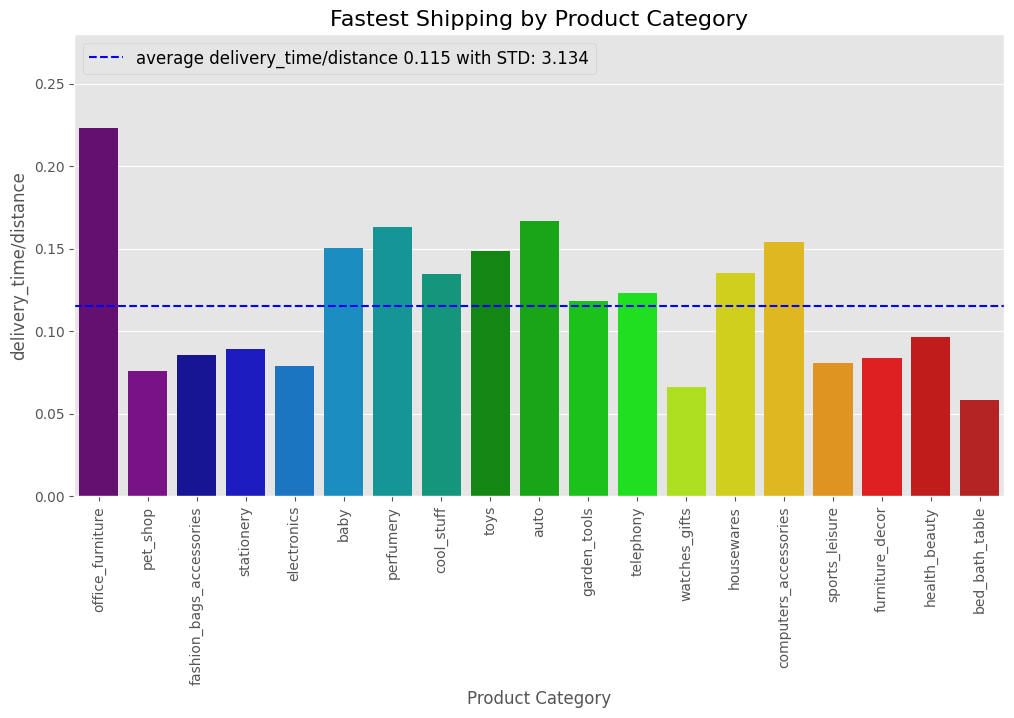

In [105]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'product_category_name_english', y= 'delivery_time/distance', data=fastest_shipping_by_product_category,
           orient='v', palette= 'nipy_spectral')
plt.xticks(rotation = 90)
plt.xlabel('Product Category', size = 12)

plt.axhline(y=maindata['delivery_time/distance'].mean(), linestyle='--',
            color='blue', label = 'average delivery_time/distance '+str(round(maindata['delivery_time/distance'].mean(),3))+' with STD: ' + str(round(maindata['delivery_time/distance'].std(),3)))
plt.title('Fastest Shipping by Product Category', size=16)
plt.legend(loc='upper left', fontsize=12)
plt.ylim([0, 0.28])
plt.savefig('Fastest Shipping by Product Category.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
;

### Fastest Delivery Based on Seller City

In [31]:
fastest_delivery_by_seller_city = maindata.groupby('seller_city').agg({ 'seller_state' : 'first', 'quantity':'sum',
                                                                   'delivery_time/distance':'mean'})
fastest_delivery_by_sellert_city = fastest_delivery_by_seller_city.sort_values('delivery_time/distance', ascending=True)
fastest_delivery_by_sellert_city[:10]

,seller_state,quantity,delivery_time/distance
seller_city,,,
irece,BA,1,0.003399
cravinhos,SP,3,0.003635
barbacena/ minas gerais,MG,1,0.003668
palotina,PR,1,0.003677
aguas claras df,SP,1,0.004260
vitoria de santo antao,PE,2,0.004427
varzea alegre,CE,1,0.004484
pacatuba,CE,1,0.004753
porto velho,RO,7,0.005476


In [32]:
fastest_shipping_by_seller_city = maindata.groupby('seller_city', as_index= False).agg({ 'seller_state' : 'first', 'quantity':'sum',
                                                                   'delivery_time/distance':'mean'})

fastest_shipping_by_seller_city = fastest_shipping_by_seller_city[fastest_shipping_by_seller_city['quantity'] > 1544]
fastest_shipping_by_seller_city = fastest_shipping_by_seller_city.sort_values('quantity', ascending=True)
fastest_shipping_by_seller_city

,seller_city,seller_state,quantity,delivery_time/distance
250,itaquaquecetuba,SP,1726,0.173269
214,guarulhos,SP,2033,0.120194
395,piracicaba,SP,2080,0.043877
424,ribeirao preto,SP,2086,0.044820
315,maringa,PR,2331,0.329344
431,rio de janeiro,RJ,2344,0.228427
61,belo horizonte,MG,2501,0.110277
488,sao jose do rio preto,SP,2673,0.157681
464,santo andre,SP,2955,0.117704
155,curitiba,PR,3049,0.063317


''

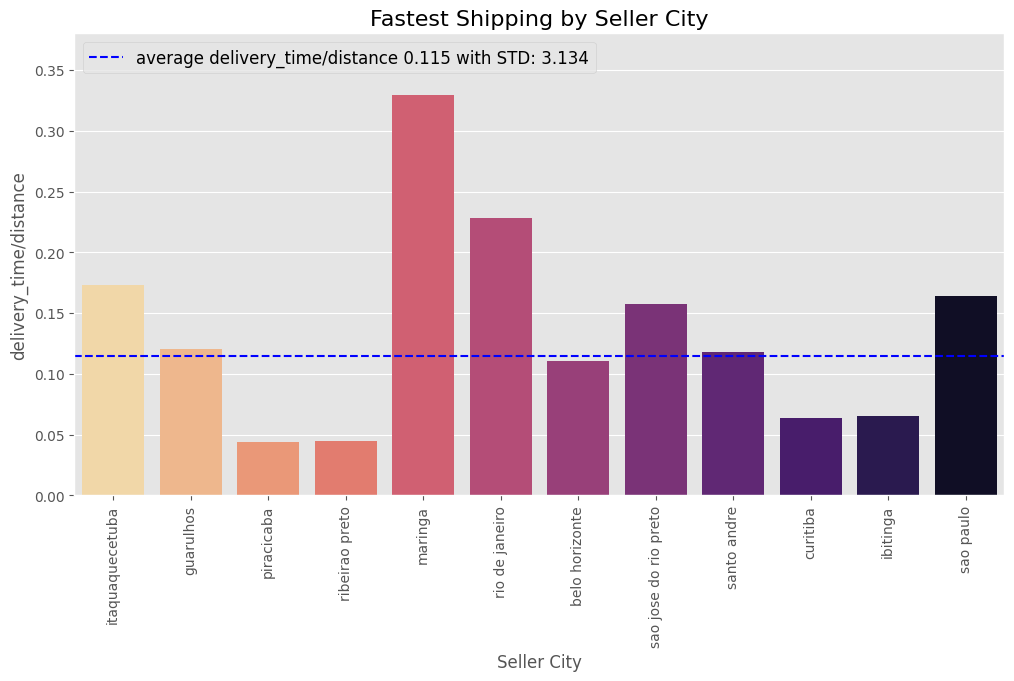

In [108]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'seller_city', y= 'delivery_time/distance', data=fastest_shipping_by_seller_city,
           orient='v', palette= 'magma_r')
plt.xticks(rotation = 90)
plt.xlabel('Seller City', size = 12)

plt.axhline(y=maindata['delivery_time/distance'].mean(), linestyle='--',
            color='blue', label = 'average delivery_time/distance '+str(round(maindata['delivery_time/distance'].mean(),3))+' with STD: ' + str(round(maindata['delivery_time/distance'].std(),3)))
plt.title('Fastest Shipping by Seller City', size=16)
plt.legend(loc='upper left', fontsize=12)
plt.ylim([0, 0.38])
plt.savefig('Fastest Shipping by Seller City.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
;

### Delivery Speed by Approved Date


In [34]:
maindata['order_approved_at'] = pd.to_datetime(maindata['order_approved_at'])
num_del_by_app_date = maindata
num_del_by_app_date['app_date_(days)'] = num_del_by_app_date['order_approved_at'].dt.strftime('%d')
num_del_by_app_date = num_del_by_app_date.groupby('app_date_(days)', as_index = False).agg({'quantity': lambda x : x.sum(),
                                                                          'delivery_time/distance': lambda x : x.mean()})
num_del_by_app_date = num_del_by_app_date.sort_values('app_date_(days)')
num_del_by_app_date

,app_date_(days),quantity,delivery_time/distance
0,01,3638,0.076012
1,02,3451,0.093689
2,03,3551,0.073282
3,04,3284,0.123602
4,05,4458,0.137456
5,06,3856,0.251609
6,07,4032,0.158165
7,08,3729,0.106412
8,09,3598,0.074706
9,10,3687,0.141443


''

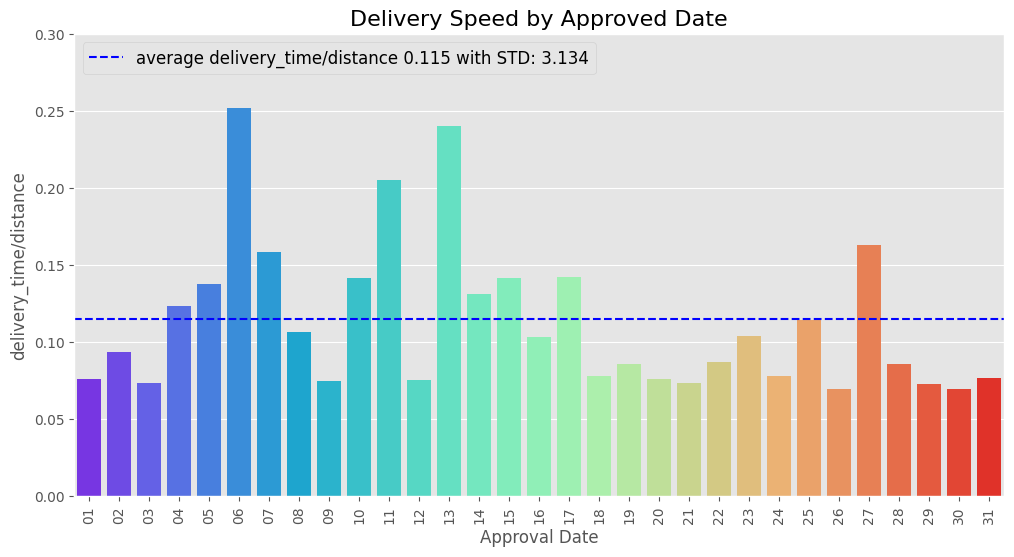

In [109]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'app_date_(days)', y= 'delivery_time/distance', data=num_del_by_app_date,
           orient='v', palette= 'rainbow')
plt.xticks(rotation = 90)
plt.xlabel('Approval Date', size = 12)

plt.axhline(y=maindata['delivery_time/distance'].mean(), linestyle='--',
            color='blue', label = 'average delivery_time/distance '+str(round(maindata['delivery_time/distance'].mean(),3))+' with STD: ' + str(round(maindata['delivery_time/distance'].std(),3)))
plt.title('Delivery Speed by Approved Date', size=16)
plt.legend(loc='upper left', fontsize=12)
plt.ylim([0., 0.3])
plt.savefig('Delivery Speed by Approved Date.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
;

### Delivery Speed by Carrier Date


In [36]:
maindata['order_delivered_carrier_date'] = pd.to_datetime(maindata['order_delivered_carrier_date'])
num_del_by_car_date = maindata
num_del_by_car_date['car_date_(days)'] = num_del_by_car_date['order_delivered_carrier_date'].dt.strftime('%d')
num_del_by_car_date = num_del_by_car_date.groupby('car_date_(days)', as_index= False).agg({'quantity': lambda x : x.sum(),
                                                                          'delivery_time/distance': lambda x : x.mean()})
num_del_by_car_date = num_del_by_car_date.sort_values('car_date_(days)')
num_del_by_car_date

,car_date_(days),quantity,delivery_time/distance
0,01,2586,0.079701
1,02,3444,0.171822
2,03,3603,0.059611
3,04,3622,0.075345
4,05,3537,0.073702
5,06,4151,0.074589
6,07,4096,0.181168
7,08,3847,0.145914
8,09,3963,0.076911
9,10,3632,0.109788


''

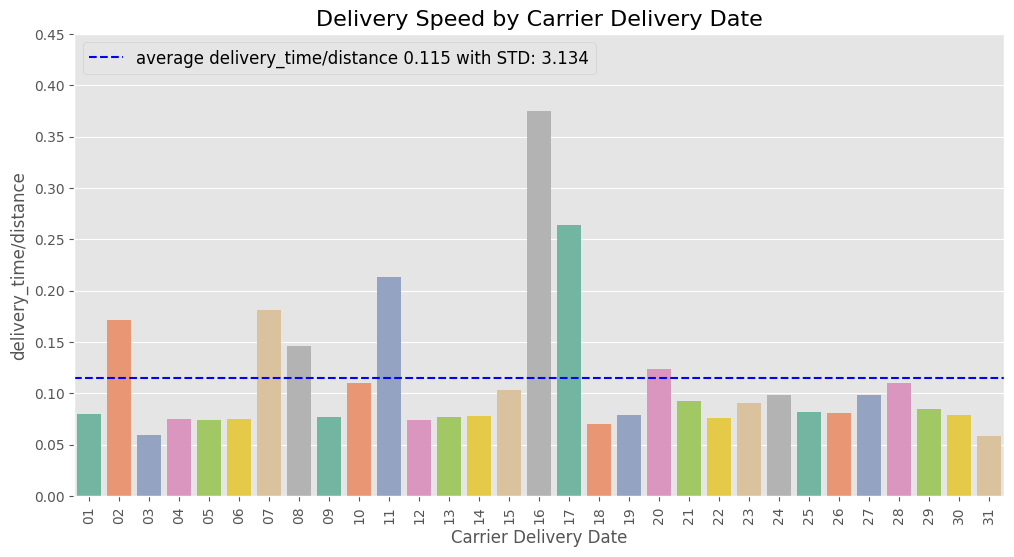

In [110]:
plt.figure(figsize= (12,6))
sns.barplot(x= 'car_date_(days)', y= 'delivery_time/distance', data=num_del_by_car_date,
           orient='v', palette= 'Set2')
plt.xticks(rotation = 90)
plt.xlabel('Carrier Delivery Date', size = 12)

plt.axhline(y=maindata['delivery_time/distance'].mean(), linestyle='--',
            color='blue', label = 'average delivery_time/distance '+str(round(maindata['delivery_time/distance'].mean(),3))+' with STD: ' + str(round(maindata['delivery_time/distance'].std(),3)))
plt.ylim([0,0.45])
plt.title('Delivery Speed by Carrier Delivery Date', size=16)
plt.legend(loc='upper left', fontsize=12)
plt.savefig('Delivery Speed by Carrier Delivery Date.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
;

Berdasarkan observasi dari 4 visualisasi data diatas dapat disimpulkan bahwa kecepatan pengiriman tidak dipengaruhi oleh produk kategori ``[product_category_name_english]``, kota asal penjual ``[seller_city]``, banyaknya order pada tanggal order approved ``[order_approved_at]``, dan banyaknya pengiriman pada tanggal barang diserahkan ke pihak ekspedisi ``[car_date_(days)]``, ini dapat dimaknai dari sebaran data dari 4 kategori tersebut variasi nya masih dalam range satu kali standart deviasi.

# **Adakah Hubungan Antara Delivery Performance Terhadap Kepuasan Pelanggan**

In [20]:
rev_sco_to_del_per = maindata
rev_sco_to_del_per = rev_sco_to_del_per.groupby('review_score', as_index= False).agg({'seller_delivery_performance (days)': lambda x : x.mean(),
                                                                                     'delivery_time/distance': lambda x : x.mean(),
                                                                                     'delivery_performance (days)': lambda x : x.mean()})
rev_sco_to_del_per = rev_sco_to_del_per.sort_values('review_score')
rev_sco_to_del_per

,review_score,seller_delivery_performance (days),delivery_time/distance,delivery_performance (days)
0,1,1.777650,0.155658,3.978377
1,2,2.409953,0.160556,8.187558
2,3,2.664490,0.132113,10.000605
3,4,2.884964,0.071133,11.398652
4,5,3.094995,0.117120,12.427837


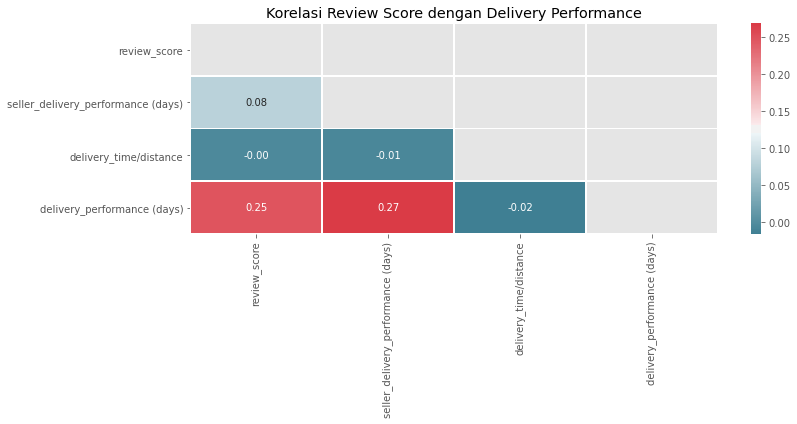

In [21]:
corr = maindata[rev_sco_to_del_per.columns].corr()
fig, ax = plt.subplots(figsize = (12,6))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap=colormap, linewidths=0.5, annot=True, fmt=".2f", mask=dropSelf)
plt.title('Korelasi Review Score dengan Delivery Performance')
plt.tight_layout()
plt.savefig('Review Score to Delivery Performance Analysis.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'})
plt.show()

Berdasarkan data diatas dapat dimaknai jika ``[review_score]``, dan ``[delivery_performance (days)]`` memiliki korelasi positif terhadap ``[review_score]``, namun untuk feature kecepatan pengiriman ``[delivery_time/distance]`` tidak terlihat pola yang menunjukan korelasi yang significat, sama seperti hubungan antara ``[delivery_time/distance]`` dengan feature yang lain pada analisa sebelumnya.

# **Seberapa Tepat Delivery Performance dari Perusahaan Terhadap Waktu Estimasi Pengiriman**

## Comparing Estimated Delivery to Delivery Time (Days)

In [114]:
maindata['order_approved_at'] = pd.to_datetime(maindata['order_approved_at'])
dist_of_est_act = maindata
dist_of_est_act['app_date_(days)'] = dist_of_est_act['order_approved_at'].dt.strftime('%d')
dist_of_est_act['est_delivery_(days)'] = (pd.to_datetime(dist_of_est_act['order_estimated_delivery_date']) 
                                           - pd.to_datetime(dist_of_est_act['order_approved_at'])).dt.days
dist_of_est_act = dist_of_est_act.groupby('app_date_(days)').agg({'est_delivery_(days)': lambda x : x.mean(),
                                                                  'delivery_time (days)': lambda x : x.mean()})
dist_of_est_act = dist_of_est_act.sort_values('app_date_(days)')
dist_of_est_act = dist_of_est_act.reset_index()
dist_of_est_act.head()

,app_date_(days),est_delivery_(days),delivery_time (days)
0,01,23.418471,11.842675
1,02,23.164908,11.864446
2,03,23.530900,11.937880
3,04,23.992828,11.918033
4,05,24.272375,11.031298


<Figure size 1200x600 with 0 Axes>

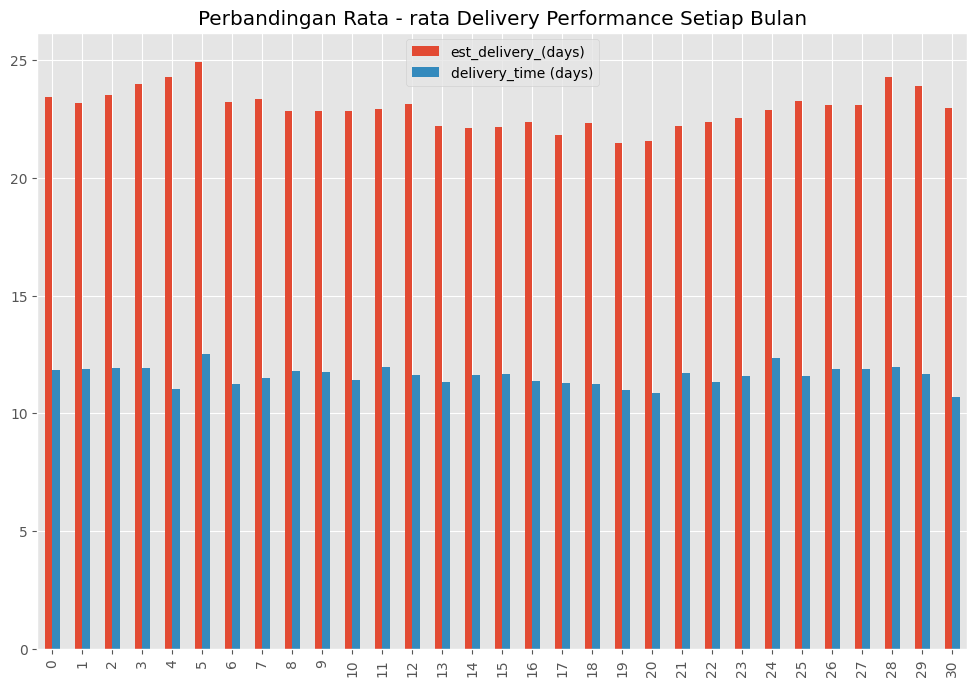

In [116]:
plt.figure(figsize = (12,6))
dist_of_est_act.drop(columns=['app_date_(days)']).plot(kind= 'bar', figsize= (12,8))
plt.title('Perbandingan Rata - rata Delivery Performance Setiap Bulan')
plt.savefig('Perbandingan Rata - rata Delivery Performance Setiap Bulan.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'});

In [46]:
maindata[['delivery_performance (days)']].mean()

delivery_performance (days)    10.981664
dtype: float64

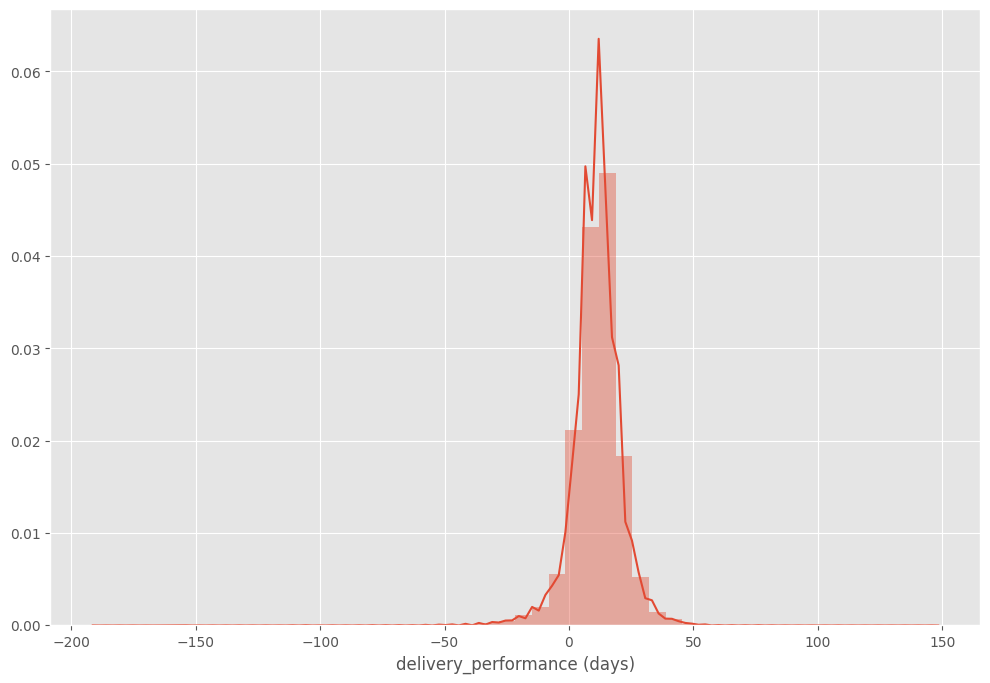

In [72]:
plt.figure(figsize= (12, 8))
sns.distplot(maindata['delivery_performance (days)']);

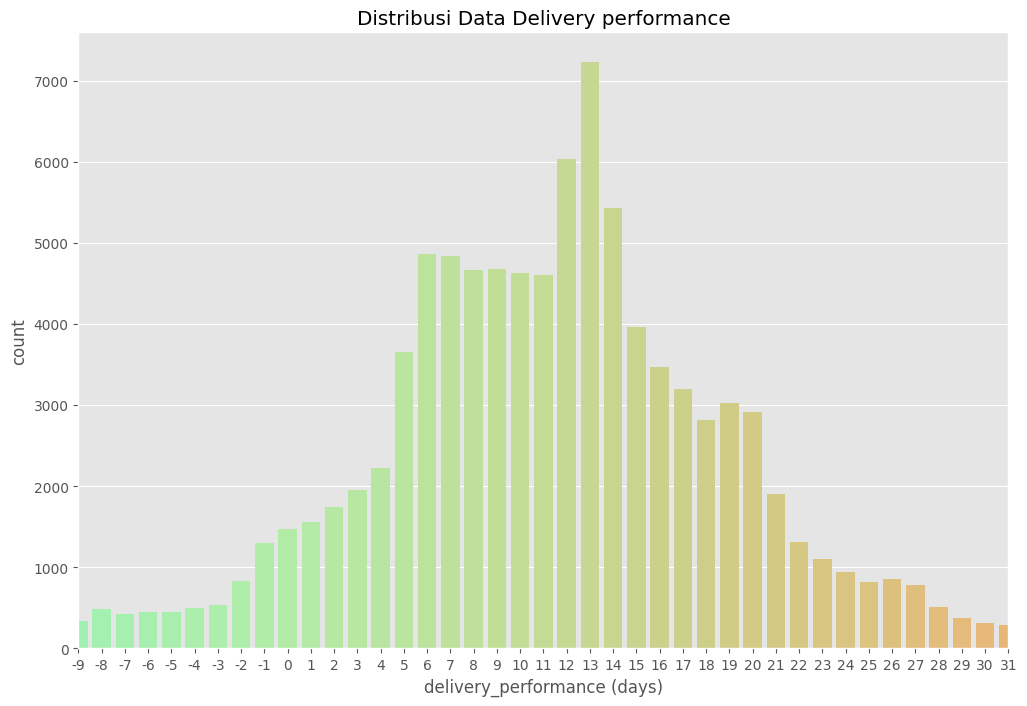

In [117]:
plt.figure(figsize= (12, 8))
sns.countplot(x='delivery_performance (days)', data=maindata, palette= 'rainbow')
plt.xlim([105,145])
plt.title('Distribusi Data Delivery performance')
plt.savefig('Distribusi Data Delivery performance.jpg', pil_kwargs={'quality': 95, 'optimize':True, 'bbox_inches' : 'tight'});

In [87]:
display(maindata.head(2), maindata.shape)

,customer_id,customer_zip_code,customer_city,customer_state,customer_lat,customer_lng,seller_id,seller_zip_code,seller_city,seller_state,seller_lat,seller_lng,distance (Km),order_id,order_status,review_score,quantity,order_purchase_timestamp,order_approved_at,shipping_limit_date,order_delivered_carrier_date,order_estimated_delivery_date,actual_delivered_date,product_id,product_category_name_english,price,total_price,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume_cm3,total_volume_cm3,freight_value,total_freight_value,total_payment,seller_delivery_performance (days),delivery_performance (days),shipping_time_(days),delivery_time (days),delivery_time/distance,app_date_(days),car_date_(days)
0,06b8999e2fba1a1fbc88172c00ba8bc7,14409,franca,SP,-20.498489,-47.396929,7c67e1448b00f6e969d365cea6b010ab,8577,itaquaquecetuba,SP,-23.486111,-46.366721,348.880143,00e7ee1b050b8499577073aeb2a297a1,delivered,4,1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-22 15:22:12,2017-05-23 10:47:57,2017-06-05 00:00:00,2017-05-25 10:35:35,a9516a079e37a9c9c36b9b78b10169e8,office_furniture,124.99,124.99,8683.0,54.0,64.0,31.0,107136.0,107136.0,21.88,21.88,146.87,-1,10,1,8,0.022931,16,23
1,85db3d57353cb12f8ccf1140ea473082,14409,franca,SP,-20.498489,-47.396929,955fee9216a65b617aa5c0531780ce60,4782,sao paulo,SP,-23.691013,-46.703810,362.214896,98991dc034323e310fdd97b8af6064b0,delivered,5,2,2018-05-08 12:12:30,2018-05-08 12:29:44,2018-05-10 12:29:44,2018-05-09 10:13:00,2018-05-22 00:00:00,2018-05-14 17:58:16,928e52a9ad53a294fdcc91bcf59d1751,housewares,130.00,260.00,1600.0,20.0,60.0,20.0,24000.0,48000.0,15.00,30.00,290.00,1,7,5,6,0.016565,08,09


(97893, 43)

In [89]:
maindata[maindata['delivery_performance (days)'] < 0].shape

(7820, 43)

In [ ]:
maindata[maindata['delivery_performance (days)'] < 0]

Berdasarkan visualisasi diatas maka dapat maknai dalam 2 tahun, rata - rata pengiriman setiap bulan selalu dibawah dari tanggal estimasi, dan rata - rata performa pengiriman dari data utama``['delivery_performance (days)']`` 10.98 hari, ini artinya barang sampai rata - rata 10.98 hari dari tanggal estimasi yang di berikan ke costumer. Ini cukup baik walau masih ada keterlambatan 7820 atau sekitar 7.9% dari total pengiriman. Serta waktu rata - rata 10.98 hari dirasa masih bisa dioptimalkan lagi ketepatanya.

# **Kesimpulan**

Berdasarkan hasil EDA untuk menjawab *Bussiness Problem* maka dapat disumpulkan bahwa:

- **Faktor Yang Mempengaruhi Waktu Pengiriman**:
    - shipping_time_(days)               :  0.928258 (sangat kuat)
    - distance (Km)                      :  0.389648 (rendah)
    - freight_value                      :  0.210303 (rendah)
    - total_freight_value                :  0.154780 (sangat rendah)
    - seller_delivery_performance (days) : -0.164441 (sangat rendah)
    - Faktor yang sangat berpengaruh adalah lama waktu pengiriman yang dibutuhkan pihak ekspedisi ``[shipping_time_(days) ]``
- **Faktor apa yang mempengaruhi kecepatan pengiriman**:
    - Feature yang memiliki numerical value yang sudah dipilih memiliki korelasi yang sangat lemah terhadap kecepatan pengiriman ``[delivery_time/distance]``, dengan nilai korelasi tertinggi yaitu -0.030996 (sangat lemah) terhadap ``[distance (Km)]``. 
    - Kecepatan pengiriman tidak dipengaruhi oleh produk kategori ``[product_category_name_english]``, kota asal penjual ``[seller_city]``, banyaknya order pada tanggal order approved ``[order_approved_at]``, dan banyaknya pengiriman pada tanggal barang diserahkan ke pihak ekspedisi ``[car_date_(days)]``, ini dapat dimaknai dari sebaran data dari 4 kategori tersebut variasi nya masih dalam range satu kali standart deviasi.
    - Baik dari observasi melalui data numerical maupun objek tidak ditemukan korelasi yang signifikan antara kecepatan waktu pengiriman ``[delivery_time/distance]``, ini dapat dimaknai bahwa kecepatan pengiriman memiliki value yang seragam tidak dipengaruhi oleh faktor yang membentuk feature kecepatan pengiriman ``[delivery_time/distance]`` sekalipun seperti ``[delivery_time (days) ]`` dan ``[distance (Km)]``, nilai diatas top threshold yang merupakan outlier (dikarenakan keterbatasan data observasi) diasumsikan sebagai anomali keterlambatan pengiriman dari human error.
- **Adakah Hubungan Antara Delivery Performance Terhadap Kepuasan Pelanggan**:
    - Berdasarkan hasil observasi dapat dimaknai jika ``[review_score]``, dan ``[delivery_performance (days)]`` memiliki korelasi positif terhadap ``[review_score]``, namun untuk feature kecepatan pengiriman ``[delivery_time/distance]`` tidak terlihat pola yang menunjukan korelasi yang signifikan, sama seperti hubungan antara ``[delivery_time/distance]`` dengan feature yang lain pada analisa sebelumnya.
- **Seberapa Tepat Delivery Performance dari Perusahaan Terhadap Waktu Estimasi Pengiriman**:
    - Berdasarkan visualisasi diatas maka dapat maknai dalam 2 tahun, rata - rata pengiriman setiap bulan selalu dibawah dari tanggal estimasi, dan rata - rata performa pengiriman dari data utama``['delivery_performance (days)']`` 10.98 hari, ini artinya barang sampai rata - rata 10.98 hari dari tanggal estimasi yang di berikan ke costumer. Ini cukup baik walau masih ada keterlambatan 7820 atau sekitar 7.9% dari total pengiriman. Serta waktu rata - rata 10.98 hari dirasa masih bisa dioptimalkan lagi ketepatanya.